# Exploratory Data Analysis: GDP vs. Life Expectancy

This project investigates the association between GDP and life expectancy. For each country, we also explore the yearly trends in GDP and life expectancy.

## Import Python Modules

We first import several modules that are required during the analysis 

In [58]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
import warnings

## Loading data and checking summary statistics  

The dataset contains 96 rows and 4 variables:

- `Country` (categorical)
- `Year` (continuous)
- `Life Expectancy at Birth (years)` (continuous)
- `GDP` (continuous)
No missing values were found in the dataset.

In [31]:
# load data 
gdp=pd.read_csv('all_data.csv')
print(gdp.head())
print(gdp.shape)
gdp.describe()

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
(96, 4)


,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [17]:
gdp.info() # checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Explortory Analysis
### Variable Distributions
The distribution of `GDP` is heavily right-skewed, with most values falling between 0 and 0.2.
The distribution of `Life Expectancy` is left-skewed, with most values ranging between 70 and 85 years.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


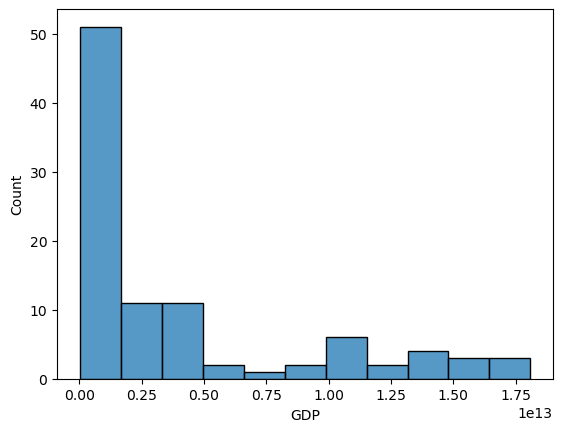

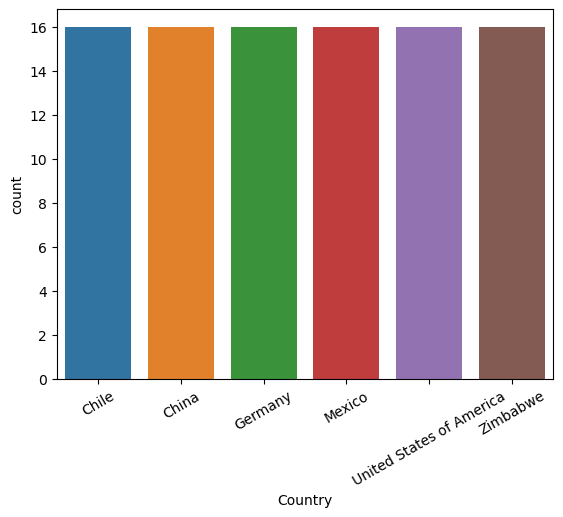

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


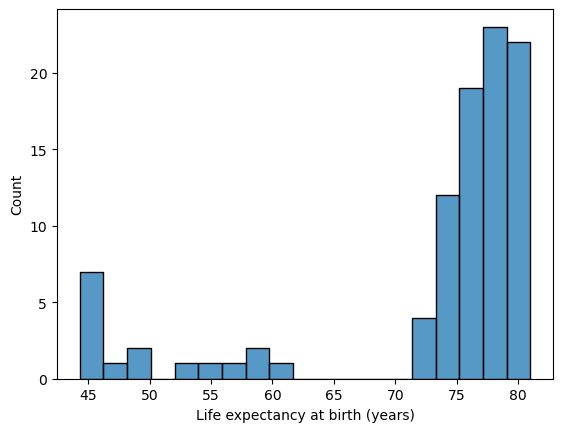

<Figure size 640x480 with 0 Axes>

In [45]:
sns.histplot(gdp.GDP) # heavy tail on the right, may need to consider log transformation  
plt.show()
plt.clf()

sns.countplot(x='Country', data=gdp)
plt.xticks(rotation=30)
plt.show()
plt.clf()

sns.histplot(gdp['Life expectancy at birth (years)']) # there are age gaps btween 63-70, ma
plt.show()
plt.clf()


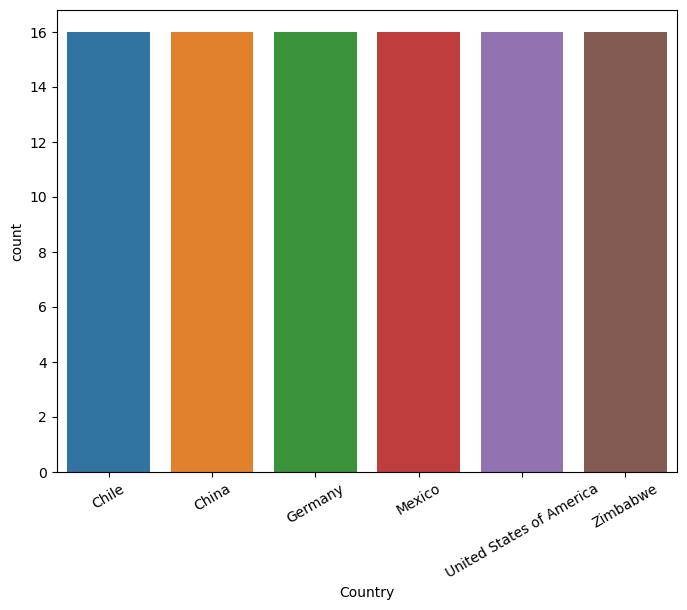

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

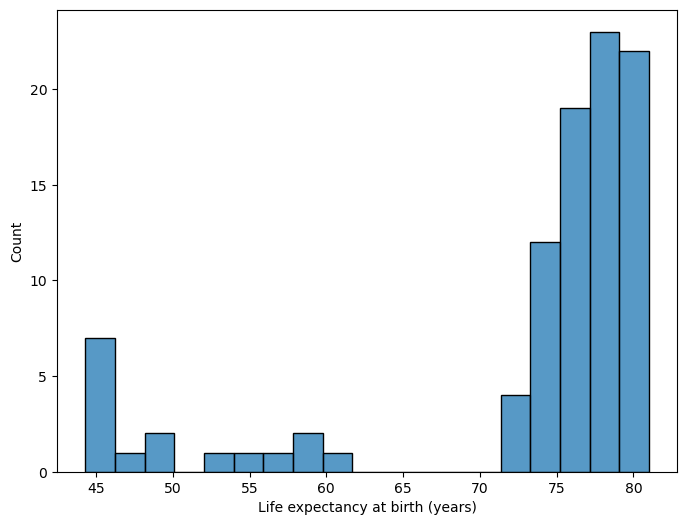

<Figure size 640x480 with 0 Axes>

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x='Country', data=gdp)
plt.xticks(rotation=30)
plt.show()
plt.clf()

plt.figure(figsize=(8,6))
sns.histplot(gdp['Life expectancy at birth (years)']) # there are age gaps btween 63-70, ma
plt.show()
plt.clf()


### Country-Specific Observations
- The United States has the highest GDP compared to other countries, contributing to the skewed GDP distribution.
- Life expectancy is relatively similar across most countries, except for Zimbabwe, where it is approximately 50 years.
  

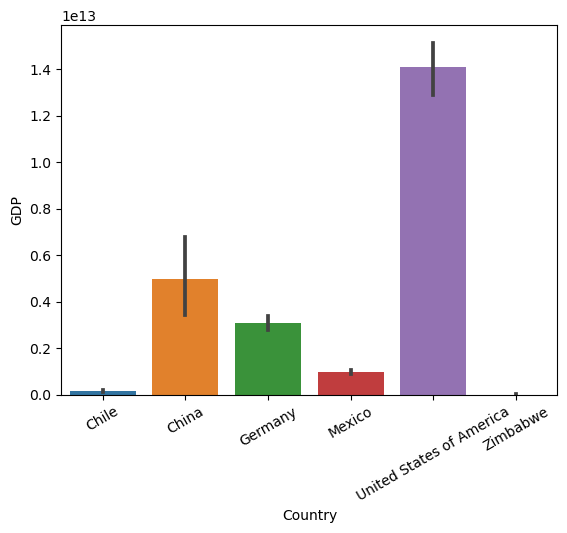

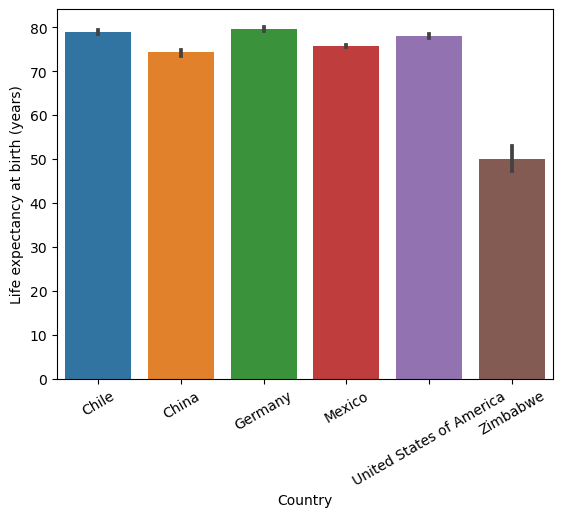

<Figure size 640x480 with 0 Axes>

In [49]:
sns.barplot(x="Country",y="GDP", data=gdp)
plt.xticks(rotation=30)
plt.show()
plt.clf()

sns.barplot(x="Country",y='Life expectancy at birth (years)', data=gdp)
plt.xticks(rotation=30)
plt.show()
plt.clf()

## Bivariate Analysis 
### Trends Over Time
- **Life Expectancy:** Generally, life expectancy increases over time for most countries. However, Zimbabwe shows a notable dip around 2005.
- **GDP:** GDP trends are generally upward, with Zimbabwe experiencing a significant dip around 2008.

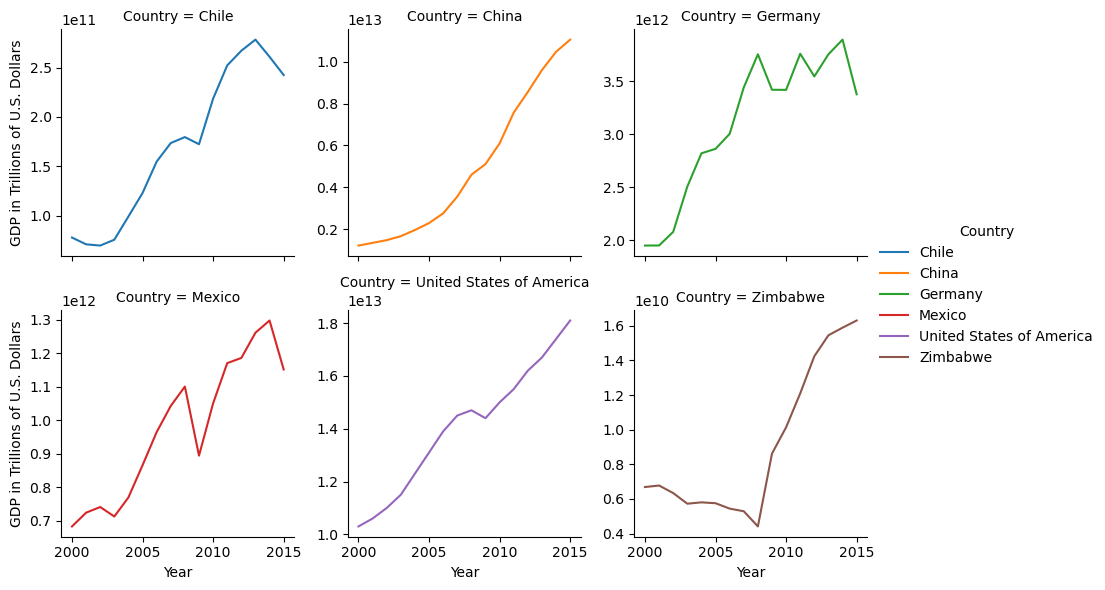

In [59]:
warnings.filterwarnings('ignore')
graphGDP = sns.FacetGrid(gdp, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

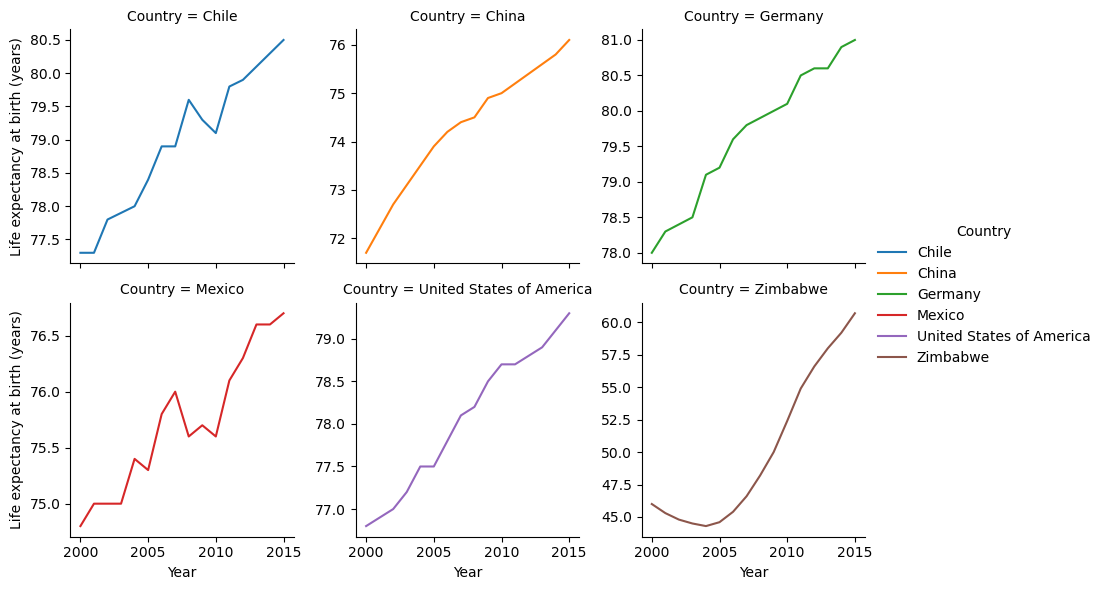

In [61]:
warnings.filterwarnings('ignore')
graphGDP = sns.FacetGrid(gdp, col='Country', col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","Life expectancy at birth (years)")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphGDP;

For each country, there is a clear positive linear relationship between GDP and life expectancy. Countries with higher GDPs tend to have longer life expectancies.

<Axes: xlabel='Life expectancy at birth (years)', ylabel='GDP'>

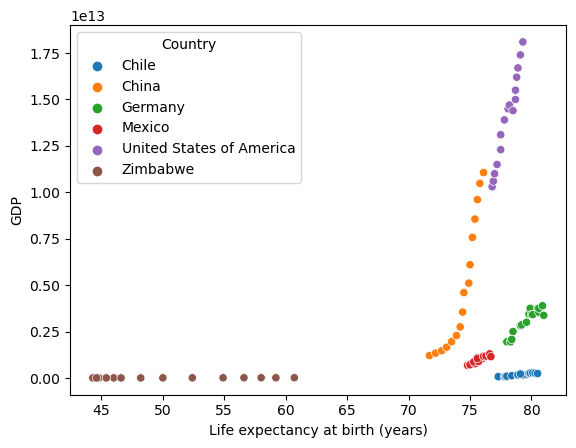

In [50]:
sns.scatterplot(data=gdp,x='Life expectancy at birth (years)',y='GDP',hue='Country')


We then break down the data by country to examine the relationship between GDP and life expectancy more closely. Across all countries, we observe a consistent positive relationship between GDP and life expectancy.

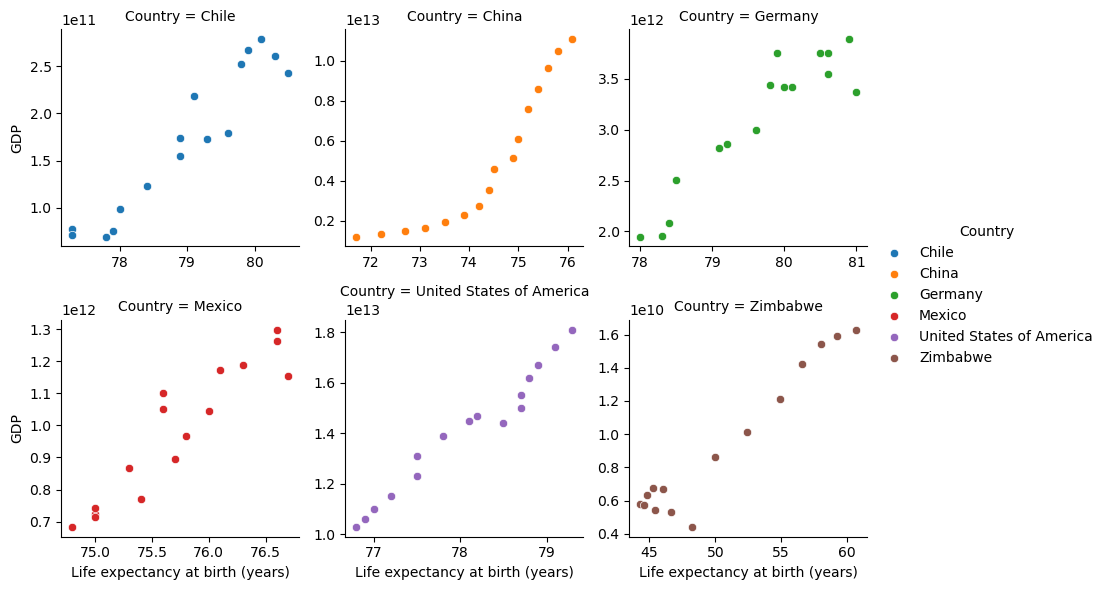

In [67]:

warnings.filterwarnings('ignore')
graphGDP = sns.FacetGrid(gdp, col='Country', col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)

graphGDP = (graphGDP.map(sns.scatterplot,"Life expectancy at birth (years)","GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)","GDP"))

graphGDP;

## Conclusion

This analysis explored the association between GDP and life expectancy across six countries. From the findings, we conclude that GDP has a notable positive relationship with life expectancy. Countries with higher GDPs generally experience longer life expectancies, suggesting that economic development plays a significant role in health outcomes.